**Step 1: Import All Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

**Step 2: Load & Basic Exploration**

In [6]:
from sklearn.datasets import fetch_openml

housing = fetch_openml(name="house_prices", as_frame=True, parser="auto")
df = housing.frame

print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nMissing Values (top 10):\n", df.isnull().sum().sort_values(ascending=False).head(10))

Shape: (1460, 81)

Data Types:
 object     43
int64      35
float64     3
Name: count, dtype: int64

Missing Values (top 10):
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageQual        81
GarageYrBlt       81
GarageType        81
dtype: int64


**Step 3: Data Cleaning**

In [7]:
# Drop columns with too many missing values
df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

# Fill numerical nulls with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical nulls with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("Missing values after cleaning:", df.isnull().sum().sum())


Missing values after cleaning: 0


**Step 4: Encode Categorical Columns**

In [8]:
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("All columns are now numeric ")
print(df.shape)

All columns are now numeric 
(1460, 76)


**Step 5: Define Features & Target**

In [9]:
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1460, 74)
Target shape: (1460,)


**Step 6: Train/Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1168, 74)
Test size: (292, 74)


**Step 7: Train the Model**

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


**Step 8: Evaluate the Model**

In [13]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE  : ${rmse:,.2f}")
print(f"R² Score : {r2:.4f}")

RMSE  : $34,465.05
R² Score : 0.8451


**Step 9: Visualize — Actual vs Predicted**

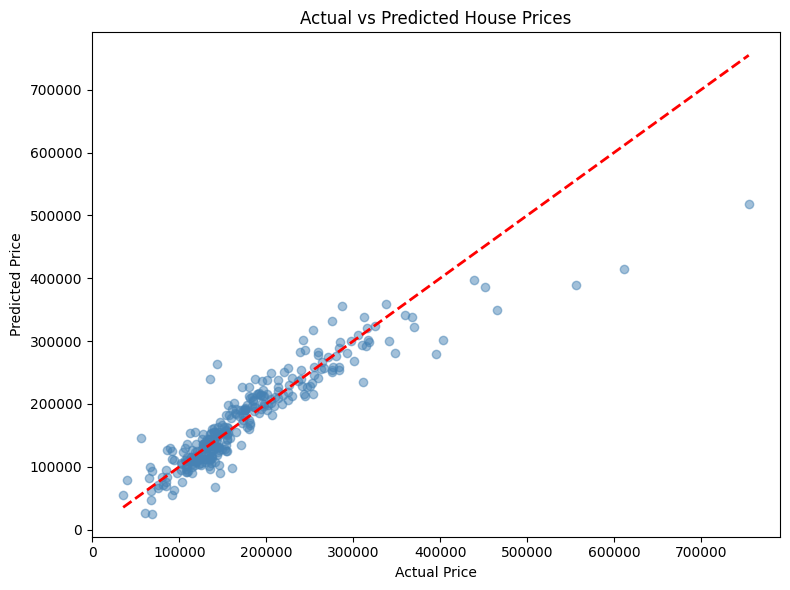

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()